In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
!pip install matplotlib

    100% |████████████████████████████████| 14.4MB 2.1MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 10.9MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 11.0MB/s ta 0:00:01


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

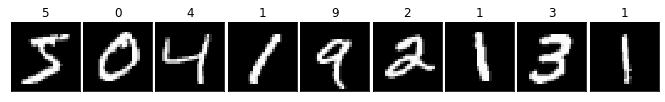

In [20]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# 各MNIST画像の上に（タイトルとして）対応するラベルを表示
for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

In [26]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1,784)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 1.1.1 モデル構築

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [29]:
model = Sequential()

In [31]:
model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,
         batch_size=1000, epochs=10,verbose=1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.0699 - acc: 0.5515 - val_loss: 4.3373 - val_acc: 0.7240
Epoch 2/10
60000/60000 [==============================] - 1s 11us/step - loss: 4.0968 - acc: 0.7384 - val_loss: 3.9371 - val_acc: 0.7489
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 3.1408 - acc: 0.7938 - val_loss: 2.6638 - val_acc: 0.8187
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 1.3388 - acc: 0.9045 - val_loss: 0.9057 - val_acc: 0.9310
Epoch 5/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.9267 - acc: 0.9324 - val_loss: 0.8108 - val_acc: 0.9381
Epoch 6/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.7353 - acc: 0.9445 - val_loss: 0.6498 - val_acc: 0.9493
Epoch 7/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.6379 - acc: 0.9516 - val_loss: 0.7199 - val_acc

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5315581795730706
Test accuracy: 0.9584


In [45]:
classes = model.predict(x_test, batch_size=128)

In [46]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

In [41]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [42]:
!pip install pydot graphviz

In [43]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.